* Load data
* Load xml. Get I(d) for pack C26B

The xml only changes C26B pack, which was fit to difc and L2

# Load data

In [1]:
workdir = '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/'
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/detcalib/SEQ


In [2]:
# setup plotting
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np, os

In [3]:
import os
from mantid import simpleapi as msa, mtd

In [4]:
%%time
# about 4min
orig_ws = msa.LoadEventNexus(
    Filename="/SNS/SEQ/IPTS-19573/nexus/SEQ_130249.nxs.h5", FilterByTimeStart=0, FilterByTimeStop=2000)

CPU times: user 3min 1s, sys: 1min 12s, total: 4min 13s
Wall time: 47.4 s


In [5]:
ws = orig_ws
instrument = ws.getInstrument()
pack = instrument.getComponentByName("C26B/eightpack-bottom")
firstpixel = pack[0][0].getID()
lasttube = pack[pack.nelements()-1]
lastpixel = lasttube[lasttube.nelements()-1]
lastpixel = lastpixel.getID()
print "first and last pixel IDs:", firstpixel, lastpixel
#
detIDs = []
for i in range(ws.getNumberHistograms()):
    sp = ws.getSpectrum(i)
    dets = list(sp.getDetectorIDs())
    assert len(dets)==1
    detIDs.append(dets[0])
    continue
for i in range(len(detIDs)-1):
    assert detIDs[i] < detIDs[i+1]
#
startindex = detIDs.index(firstpixel)
endindex = detIDs.index(lastpixel)
print "first and last pixel indexes:", startindex, endindex
del ws

first and last pixel IDs: 103424 104447
first and last pixel indexes: 65536 66559


# Old I(d)

In [6]:
%%time
I_d_0 = msa.ConvertUnits(InputWorkspace=orig_ws, Target='dSpacing', EMode='Elastic')
I_d_0 = msa.Rebin(InputWorkspace=I_d_0, Params='2,0.01,11')

CPU times: user 44.2 s, sys: 1min 6s, total: 1min 50s
Wall time: 1min 50s


In [7]:
pack_I_d_0 = msa.SumSpectra(InputWorkspace=I_d_0, StartWorkspaceIndex=startindex, EndWorkspaceIndex=endindex)

In [8]:
xbb0 = pack_I_d_0.readX(0); y0 = pack_I_d_0.readY(0).copy()
x0 = (xbb0[1:] + xbb0[:-1])/2

# New I(d)

In [9]:
msa.LoadInstrument(orig_ws, Filename='./SEQ_new.xml.fit-to-difc-and-L2_Si+C60', RewriteSpectraMap=False)

array([-2, -1], dtype=int32)

In [10]:
%%time
I_d_1 = msa.ConvertUnits(InputWorkspace=orig_ws, Target='dSpacing', EMode='Elastic')
I_d_1 = msa.Rebin(InputWorkspace=I_d_1, Params='2,0.01,11')

CPU times: user 40.8 s, sys: 1min 7s, total: 1min 48s
Wall time: 1min 48s


In [11]:
pack_I_d_1 = msa.SumSpectra(InputWorkspace=I_d_1, StartWorkspaceIndex=startindex, EndWorkspaceIndex=endindex)

In [12]:
xbb1 = pack_I_d_1.readX(0); y1 = pack_I_d_1.readY(0).copy()
x1 = (xbb1[1:] + xbb1[:-1])/2

<IPython.core.display.Javascript object>


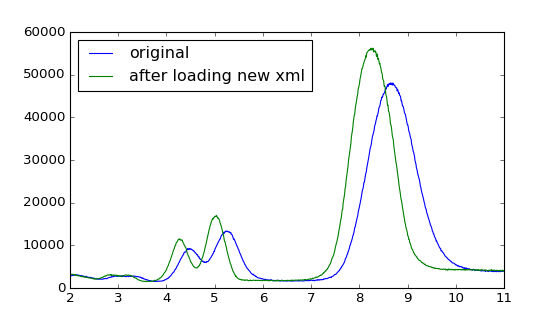

In [13]:
plt.figure(figsize=(7,4))
plt.plot(x0, y0, label='original')
plt.plot(x1, y1, label='after loading new xml')
# plt.xlim(3,3.3)
plt.legend(loc='upper left')